## Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
# Load the datasets
customers_df = pd.read_csv('../Dataset/Customers.csv')
transactions_df = pd.read_csv('../Dataset/Transactions.csv')

In [8]:
customers_df['Region'] = customers_df['Region'].astype('category')
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

## Feature Engineering

In [9]:
# Feature engineering - create customer features based on transactions
customer_data = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'TransactionDate': ['max', 'count'],  # Recency and frequency
    'ProductID': 'nunique'  # Number of unique products
}).reset_index()
customer_data.columns = ['CustomerID', 'TotalSpend', 'LastPurchase', 'PurchaseCount', 'UniqueProducts']

## Merge Customer Profile Data

In [10]:
# Merge with customer profile data
customer_data = pd.merge(customer_data, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

## Normalize data

In [11]:
# Normalize the data
features = ['TotalSpend', 'PurchaseCount', 'UniqueProducts']
X = customer_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply K-Means

In [12]:
# Apply K-Means clustering for different values of k (clusters)
cluster_results = {}

for k in range(2, 11):  # Try different number of clusters (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    customer_data['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Compute DB Index and Silhouette Score
    db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])
    silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])
    
    cluster_results[k] = {
        'DB_Index': db_index,
        'Silhouette_Score': silhouette_avg
    }

In [13]:
# Print DB Index and Silhouette Score for each k
for k, metrics in cluster_results.items():
    print(f'For {k} clusters: DB Index = {metrics["DB_Index"]}, Silhouette Score = {metrics["Silhouette_Score"]}')

For 2 clusters: DB Index = 0.7326724318621638, Silhouette Score = 0.48590745365888227
For 3 clusters: DB Index = 0.7549563236514455, Silhouette Score = 0.43295148943188855
For 4 clusters: DB Index = 0.8081741157829812, Silhouette Score = 0.3944270046768865
For 5 clusters: DB Index = 0.846595454615373, Silhouette Score = 0.40536412881956946
For 6 clusters: DB Index = 0.8592769772807477, Silhouette Score = 0.4031659295351326
For 7 clusters: DB Index = 0.8298239836000401, Silhouette Score = 0.40918625772975953
For 8 clusters: DB Index = 0.8629786925110348, Silhouette Score = 0.39994006368262314
For 9 clusters: DB Index = 0.8134292549621214, Silhouette Score = 0.4041225003655533
For 10 clusters: DB Index = 0.7950029050097198, Silhouette Score = 0.4026770957582663


In [14]:
# Select the best k based on metrics (lowest DB Index or highest Silhouette Score)
best_k = min(cluster_results, key=lambda x: cluster_results[x]['DB_Index'])  # Or use silhouette_score
print(best_k)

2


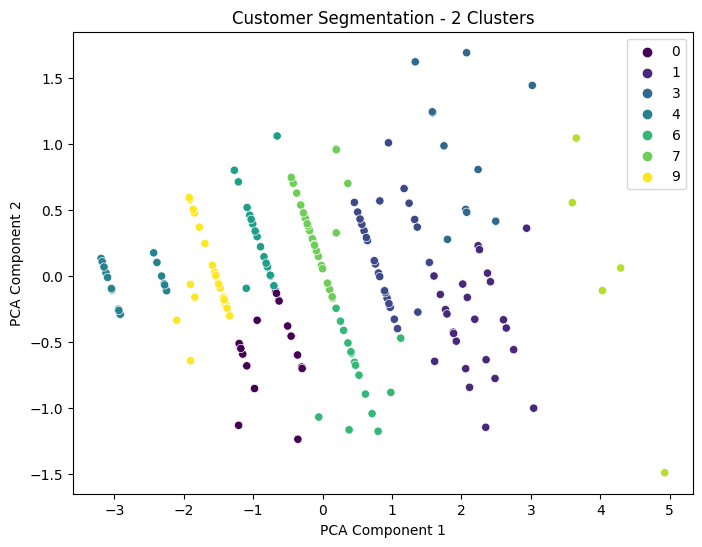

In [15]:
# Visualize the clusters using PCA (to reduce dimensions to 2 for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_data['Cluster'], palette='viridis')
plt.title(f'Customer Segmentation - {best_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [16]:
# Save the clustering result (with customer ID and cluster assignment)
customer_data.to_csv('Clustered_Customers.csv', index=False)

# Two Cluster Graph

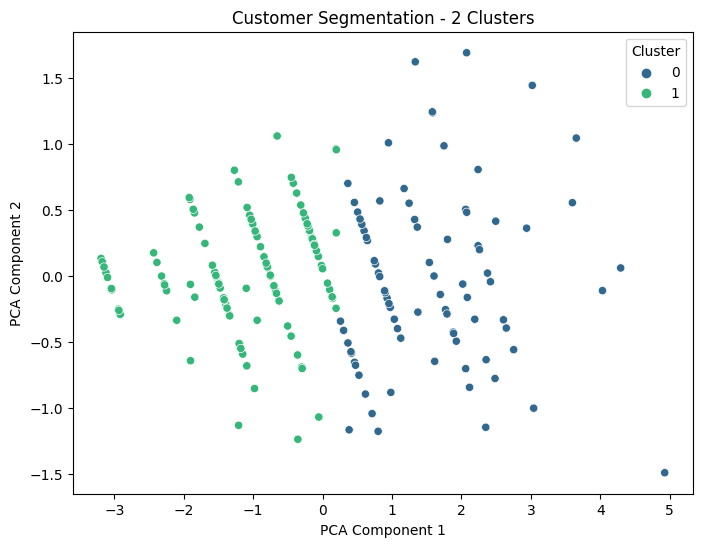

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the KMeans model for 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
customer_data['Cluster_2'] = kmeans_2.fit_predict(X_scaled)  # Assign clusters for 2 clusters

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=customer_data['Cluster_2'], palette='viridis')
plt.title('Customer Segmentation - 2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()